In [2]:
library(stringr)

In [3]:
train_df <- read.csv(gzfile("train.csv.gz"), as.is=TRUE)
test_df <- read.csv(gzfile("test.csv.gz"), as.is=TRUE)

In [4]:
head(train_df)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
4,A683430,,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
5,A667013,,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
6,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan


In [5]:
head(test_df)

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
2,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
3,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
4,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
5,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
6,6,Beau,2015-06-23 11:17:00,Dog,Neutered Male,3 years,Beagle Mix,Brown/White


In [6]:
length(unique(train_df$AnimalID))
nrow(train_df)

[1] 26729

[1] 26729

In [7]:
table(test_df$AnimalType)


 Cat  Dog 
4800 6656 

In [8]:
table(test_df$SexuponOutcome)


Intact Female   Intact Male Neutered Male Spayed Female       Unknown 
         1493          1460          4235          3813           455 

In [9]:
table(test_df$AgeuponOutcome)


            0 years     1 day   1 month    1 week   1 weeks    1 year 10 months 
        6        13        18       501        74        76      1768       196 
 10 years 11 months  11 years  12 years  13 years  14 years  15 years  16 years 
      152        75        48        96        71        46        30         9 
 17 years  18 years  19 years    2 days  2 months   2 weeks   2 years  20 years 
       13         2         2        40      1532       198      1641         5 
 22 years    3 days  3 months   3 weeks   3 years    4 days  4 months   4 weeks 
        2        39       511       291       766        28       395       131 
  4 years    5 days  5 months   5 weeks   5 years    6 days  6 months   6 years 
      435        14       277         4       414        30       247       257 
 7 months   7 years  8 months   8 years  9 months   9 years 
      167       238       167       236        89       106 

In [72]:
unit_multiplier <- c(day=1, week=7, month=30, year=365)
text_2_time_in_days <- function(str_value) {
    match <- str_match(str_value, "(\\d+) ([a-r,t-z]+)")
    value <- as.numeric(match[2])
    unit <- match[3]
    value_in_days <- value * as.numeric(unit_multiplier[unit])
    return(value_in_days)
}

In [73]:
match <- mapply(text_2_time_in_days, train_df$AgeuponOutcome)
new_train_df <- cbind(train_df, age_in_days=match)

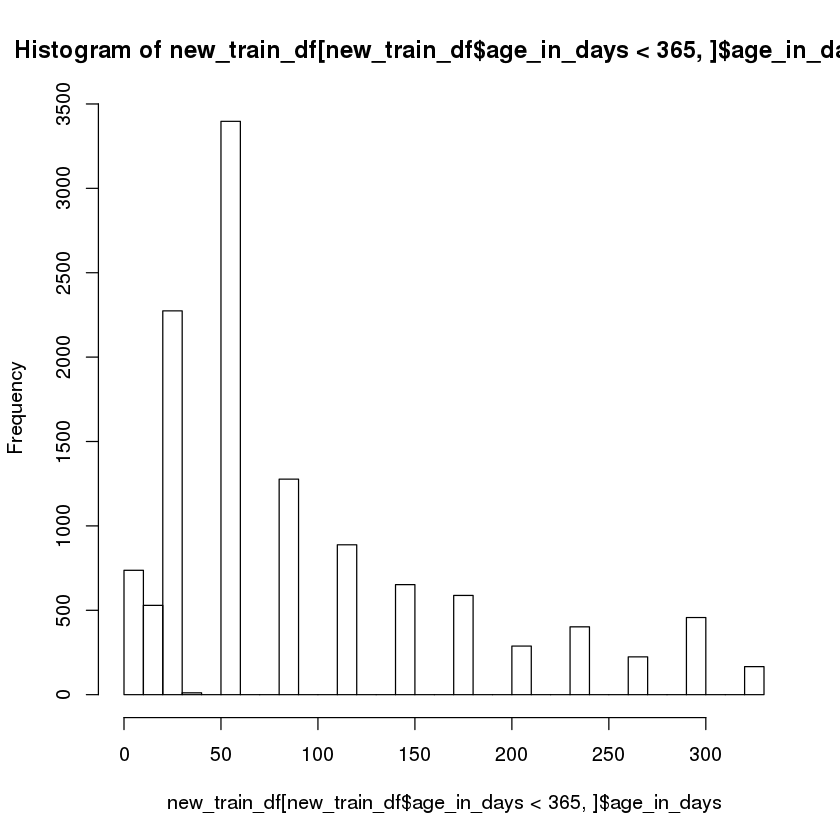

In [89]:
hist(new_train_df[new_train_df$age_in_days < 365,]$age_in_days, breaks=30)

In [95]:
all_colors <- unique(train_df$Color)
return_color_vector <- function(multi_color_str) {
    in_color_vector <- strsplit(multi_color_str, '/', fixed=TRUE)
    color_vector_out <- setNames(logical(length(all_colors)), all_colors)
    for(i in in_color_vector) color_vector_out[i] <- TRUE
    return(color_vector_out)
}

In [100]:
color_vectors <- mapply(return_color_vector, new_train_df$Color)
new_train_df <- cbind(new_train_df, color_vectors)

ERROR: Error in data.frame(`Brown/White` = structure(c(FALSE, FALSE, FALSE, FALSE, : arguments imply differing number of rows: 366, 367
